In [26]:
import pandas as pd

# Excel 파일에서 데이터 불러오기
sheet1_data = pd.read_excel(r'C:\Users\zer12\Desktop\git-test\연봉별 퇴사율 조사.xlsx', sheet_name='Sheet1')  # r을 쓴 이유 : 한글명 엑셀이여서.

# 원본 데이터 전체 출력
print(sheet1_data)


    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          NaN        회사명       평균연봉          총         IN        OUT   
1          NaN      S-Oil   15,698만원     3,462명        10명        13명   
2          NaN      SK텔레콤   12,095만원     5,255명         0명         0명   
3          NaN       삼성화재   12,578만원     5,597명        29명        22명   
4          NaN        NaN        NaN        NaN        NaN        NaN   
5          NaN      넥슨코리아    7,071만원     3,919명        77명        68명   
6          NaN       셀트리온    7,125만원     2,718명        48명        17명   
7          NaN     한미사이언스    7,012만원       439명         6명         7명   
8          NaN        NaN        NaN        NaN        NaN        NaN   
9          NaN       홈플러스    3,313만원    19,261명       203명       312명   
10         NaN       롯데쇼핑    5,125만원     5,058명       188명       188명   
11         NaN      메가스터디    5,406만원        97명         1명         3명   

   Unnamed: 6 Unnamed: 7     Unnamed: 8  
0       

In [27]:
# 데이터 컬럼 이름 설정
sheet1_data.columns = ["Index", "Company", "Average_Salary", "Total_Employees", "IN", "OUT", "Hire_Rate", "Leave_Rate", "Period"]
print(sheet1_data)


    Index Company Average_Salary Total_Employees    IN   OUT Hire_Rate  \
0     NaN     회사명           평균연봉               총    IN   OUT       입사율   
1     NaN   S-Oil       15,698만원          3,462명   10명   13명     0.047   
2     NaN   SK텔레콤       12,095만원          5,255명    0명    0명         0   
3     NaN    삼성화재       12,578만원          5,597명   29명   22명     0.035   
4     NaN     NaN            NaN             NaN   NaN   NaN       NaN   
5     NaN   넥슨코리아        7,071만원          3,919명   77명   68명     0.057   
6     NaN    셀트리온        7,125만원          2,718명   48명   17명     0.124   
7     NaN  한미사이언스        7,012만원            439명    6명    7명     0.082   
8     NaN     NaN            NaN             NaN   NaN   NaN       NaN   
9     NaN    홈플러스        3,313만원         19,261명  203명  312명     0.065   
10    NaN    롯데쇼핑        5,125만원          5,058명  188명  188명     0.128   
11    NaN   메가스터디        5,406만원             97명    1명    3명     0.072   

   Leave_Rate         Period  
0     

In [28]:
    # NaN 값 제거
    cleaned_data = sheet1_data.dropna(subset=["Company", "Average_Salary"]) # "Company", "Average_Salary" 중 Nan값이 있으면 제외 없으면 나머지 제외
    print(cleaned_data[["Company", "Average_Salary"]])


   Company Average_Salary
0      회사명           평균연봉
1    S-Oil       15,698만원
2    SK텔레콤       12,095만원
3     삼성화재       12,578만원
5    넥슨코리아        7,071만원
6     셀트리온        7,125만원
7   한미사이언스        7,012만원
9     홈플러스        3,313만원
10    롯데쇼핑        5,125만원
11   메가스터디        5,406만원


In [29]:
# '회사명' 행 제거
cleaned_data = cleaned_data[cleaned_data["Company"] != "회사명"]
print(cleaned_data[["Company", "Average_Salary"]])


   Company Average_Salary
1    S-Oil       15,698만원
2    SK텔레콤       12,095만원
3     삼성화재       12,578만원
5    넥슨코리아        7,071만원
6     셀트리온        7,125만원
7   한미사이언스        7,012만원
9     홈플러스        3,313만원
10    롯데쇼핑        5,125만원
11   메가스터디        5,406만원


In [30]:
# 연봉 데이터 변환 ("만원", 쉼표 제거 후 숫자로 변환)
cleaned_data["Average_Salary"] = ( # 
    cleaned_data["Average_Salary"]
    .astype(str) # astype 데이터 타입 변경 (문자열로 변경)
    .str.replace("만원", "", regex=False) # 만원 > ""(공백=제거) 만원 문자열 제거
    .str.replace(",", "", regex=False) # 숫자 중 쉼표 제거 
    .astype(int) # 이제 정수로 변경
) 

print(cleaned_data[["Company", "Average_Salary"]])  # 


   Company  Average_Salary
1    S-Oil           15698
2    SK텔레콤           12095
3     삼성화재           12578
5    넥슨코리아            7071
6     셀트리온            7125
7   한미사이언스            7012
9     홈플러스            3313
10    롯데쇼핑            5125
11   메가스터디            5406


In [31]:
# 데이터 크기 확인
print("데이터 크기:", cleaned_data.shape)  # (행, 열) 형태로 데이터 크기 출력


데이터 크기: (9, 9)


In [32]:
# 연봉 기준으로 상위권, 중위권, 하위권 나누기
salary_quantiles = cleaned_data["Average_Salary"].quantile([0.33, 0.67]).to_dict() # .quantile([0.33, 0,67]) : Average_Salary열에서 33%,67% 위치 값을 계산. #to_dict() : Series 객체를 딕셔너리로 변환

cleaned_data["Salary_Category"] = pd.cut( # pd.cut() : 특정 구간(bins)으로 나누고, 각 데이터에 해당하는 구간의 라벨 할당
    cleaned_data["Average_Salary"], # Average_Salary 데이터 가져오기
    bins=[0, salary_quantiles[0.33], salary_quantiles[0.67], float("inf")], # bins: 이터 나눌 구간의 경계를 지정하는 리스트, 0 / 하위33% / 하위67% / 67%보다 큰 값
    labels=["하위권","중위권","상위권"] # bins 구간에 대해 레이블 지정
)
print(cleaned_data[["Company", "Average_Salary", "Salary_Category"]]) # Salary_Category에 대한 상위권,중위권 하위권 나누기

   Company  Average_Salary Salary_Category
1    S-Oil           15698             상위권
2    SK텔레콤           12095             상위권
3     삼성화재           12578             상위권
5    넥슨코리아            7071             중위권
6     셀트리온            7125             중위권
7   한미사이언스            7012             중위권
9     홈플러스            3313             하위권
10    롯데쇼핑            5125             하위권
11   메가스터디            5406             하위권


In [33]:
# 카테고리별 평균 퇴사율 계산
leave_rate_by_category = cleaned_data.groupby("Salary_Category")["Leave_Rate"].mean().reset_index() # cleaned_data.groupby("Salary_Category"): 하위권,중위권,상위권 그룹화,  "Leave_Rate".mean(): 퇴사율 평균을 계싼, reset_index(): 행렬행식 변환
print(leave_rate_by_category)

  Salary_Category Leave_Rate
0             하위권   0.100667
1             중위권      0.043
2             상위권      0.012


C:\Users\zer12\AppData\Local\Temp\ipykernel_9644\3973117827.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leave_rate_by_category = cleaned_data.groupby("Salary_Category")["Leave_Rate"].mean().reset_index() # cleaned_data.groupby("Salary_Category"): 하위권,중위권,상위권 그룹화,  "Leave_Rate".mean(): 퇴사율 평균을 계싼, reset_index(): 행렬행식 변환


In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic')
rc('font', family='Malgun Gothic')  # Windows 환경
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


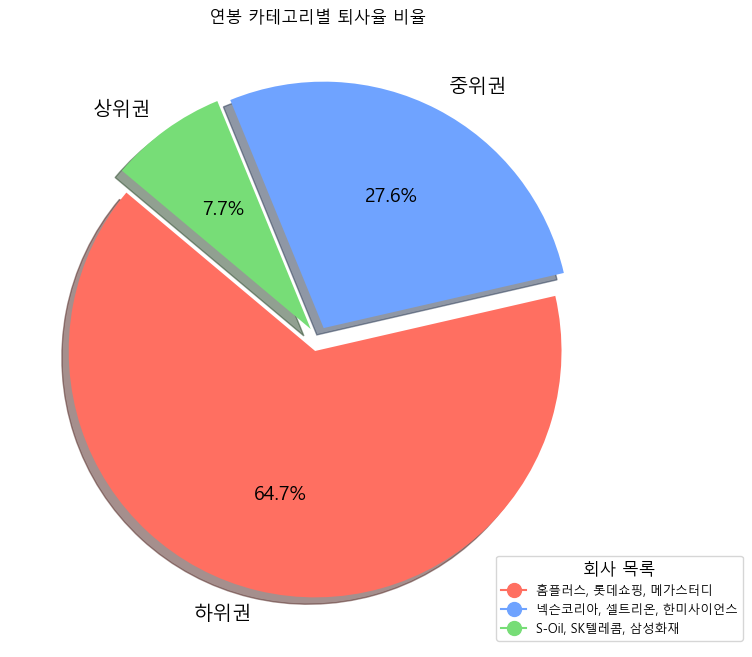

In [31]:
#시각화
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 
rc('font', family='Malgun Gothic')  # Windows 사용자
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

categories = ["하위권", "중위권", "상위권"]
leave_rate = [64.7, 27.6, 7.7]
companies_by_category = {
    "상위권": ["S-Oil", "SK텔레콤", "삼성화재"],
    "중위권": ["넥슨코리아", "셀트리온", "한미사이언스"],
    "하위권": ["홈플러스", "롯데쇼핑", "메가스터디"]
}

plt.figure(figsize=(8,8)) # 그래프 크기 설정
explode = [0.05, 0.05, 0.05] # 섹션 간격 띄우기
colors = ["#FF6F61", "#6FA3FF", "#77DD77"] #색깔

plt.pie(
    leave_rate,  # 퇴사율 데이터
    labels=categories,  # 카테고리 라벨
    # leave_rate_by_category["Leave_Rate"], # 퇴사율 시각화
    # labels=leave_rate_by_category["Salary_Category"], # 라벨
    autopct='%1.1f%%', # 소수점 표시
    startangle=140, # 시작점 각도 
    explode=explode, # 간격 띄우기
    colors=colors, # 컬러
    shadow=True, # 그림자
    textprops={'fontsize': 14} #폰트

)
#범례 생성
legend_labels = [
    f"{', '.join(companies_by_category[cat])}" for cat in categories
]
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color=colors[i], markersize=10, label=legend_labels[i])
        for i in range(len(categories))
    ],
    title="회사 목록",
    title_fontsize=12, # 범례 제목 크기 
    loc="lower right", # 범례 오른쪽 아래로 배치
    fontsize=9,
    bbox_to_anchor=(1.2,0), # 위치 조정
    ncol=1 #열 개수

)
plt.title("연봉 카테고리별 퇴사율 비율")
plt.show()